<a href="https://colab.research.google.com/github/debangana97/Data-science-works/blob/main/Breast_cancer_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Breast Cancer (Wisconsin) Dataset**
**Principal Component Analysis**

**k-means Clustering and K-NN Classification**

In [1]:
#Mounting google drive to colab to fetch the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the breast cancer wisconsin(diagnostic) dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Breast cancer data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#removing the unnecessary columns
exclude = ['Unnamed: 32','id']
data = data.drop(exclude, axis = 1)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
#checking for the presence of missing values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


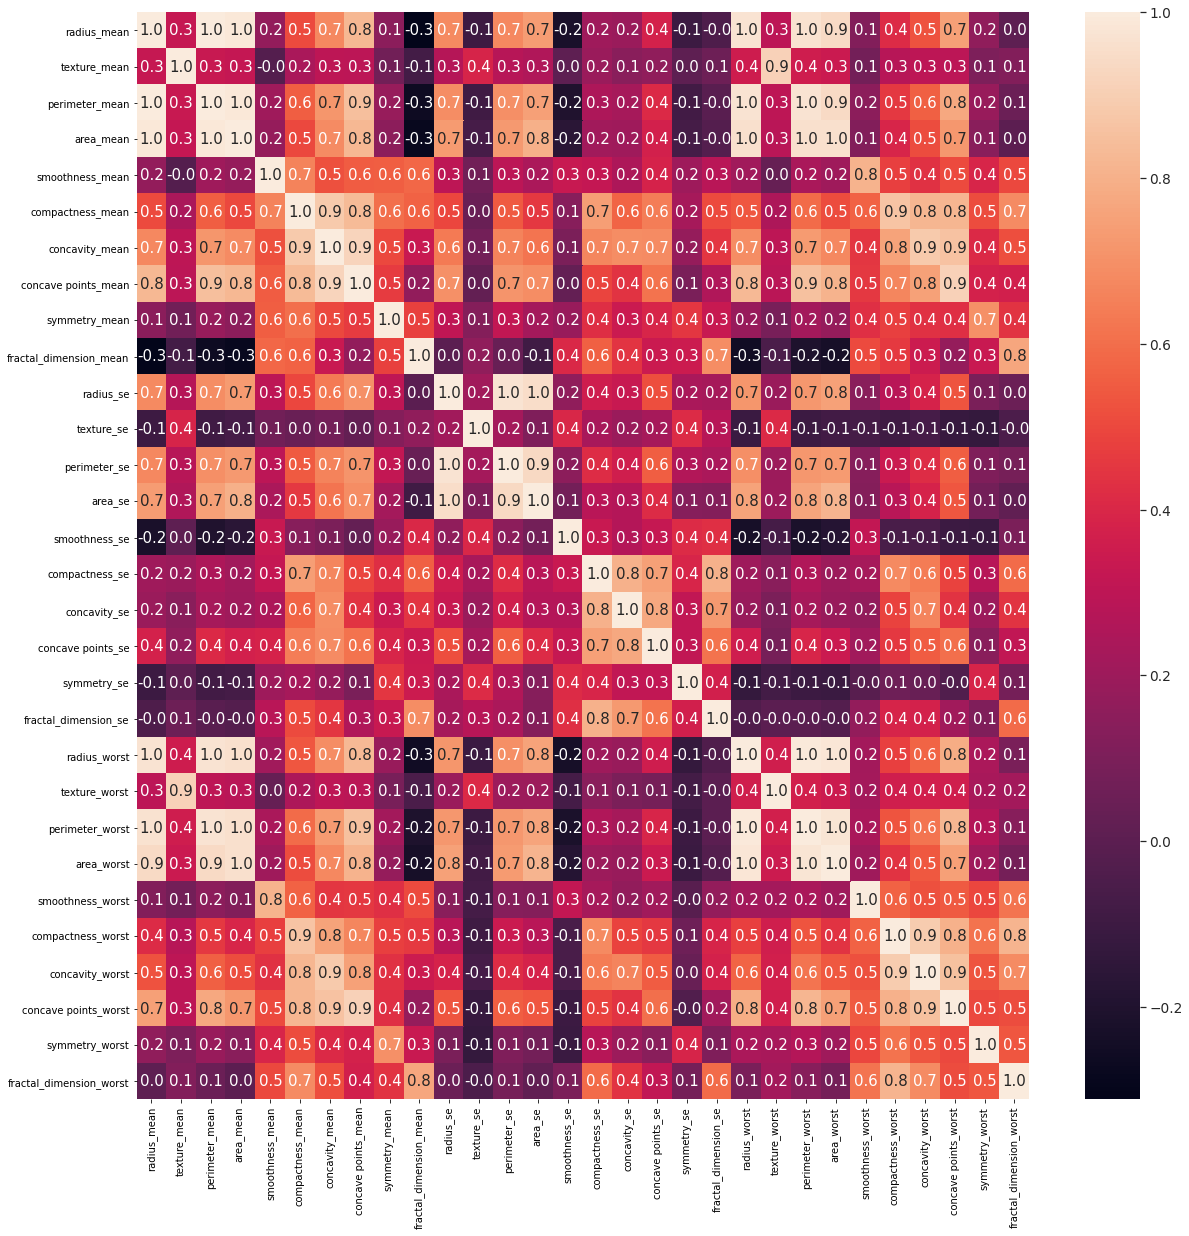

In [7]:
#plotting a heatmap to learn about the correlations
f, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=1.25)
sns.heatmap(data.corr(), annot= True, fmt='.1f')
plt.show()

In [8]:
#splitting into matrix of features X and target variable Y
y = data.diagnosis
x = data.iloc[:,1:31]

In [9]:
print(y)
y.describe()

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [10]:
print(x)

     radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [11]:
#splitting into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)   #20% of the data is used for testing while 80% serves as training data

In [12]:
print(x_train.shape)
print(y_train.shape)

(455, 30)
(455,)


In [13]:
#standardization or feature scaling of the matrix of features X which does both centering and normalizing of the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [14]:
print(np.mean(x_train_std))
print(np.std(x_train_std))

4.021203394686281e-17
1.0


### **PCA using eigen values and their projection on 2D plane**

In [15]:
#Finding the covariance matrix which is M^T*M
cov_matrix = np.matmul(x_train_std.T, x_train_std)
print('The dimension of the covariance matrix is: ', cov_matrix.shape)

The dimension of the covariance matrix is:  (30, 30)


In [16]:
#finding the top 2 eigen values and corresponding eigen vectors

from scipy.linalg import eigh
ev = eigh(cov_matrix, eigvals_only=True)
print(ev)
#eigh will return eigen values in ascending order

e_values_1, e_vectors_1 = eigh(cov_matrix, eigvals = (28,29))
#generates only the largest and the second largest eigen values which are (28,29) for visualization

print('The shape of the eigen vectors is: ', e_vectors_1.shape)

e_vectors_1 = e_vectors_1.T
#converting into 2D shape for easiness
print('Changed shape of eigen vectors is: ', e_vectors_1.shape)

[5.07658288e-02 3.45628144e-01 6.31318056e-01 2.95047757e+00
 3.56946759e+00 7.46170929e+00 7.93182141e+00 9.88643850e+00
 1.19909099e+01 1.35764022e+01 1.44886240e+01 2.05315914e+01
 2.32893984e+01 2.72518819e+01 3.61151946e+01 4.25228128e+01
 7.57997663e+01 1.05301440e+02 1.22464429e+02 1.38160146e+02
 1.58352498e+02 1.90658101e+02 2.06482551e+02 2.93373168e+02
 5.55776045e+02 7.70194650e+02 9.11500669e+02 1.27651670e+03
 2.69452564e+03 5.92829976e+03]
The shape of the eigen vectors is:  (30, 2)
Changed shape of eigen vectors is:  (2, 30)


In [17]:
#projecting the data on the 2D plane
new_coordinates_1 = np.matmul(e_vectors_1, x_train_std.T)
print('The shape of the resultant new data points is: ', e_vectors_1.shape,'X',x_train_std.T.shape, '=', new_coordinates_1.shape)

The shape of the resultant new data points is:  (2, 30) X (30, 455) = (2, 455)


In [18]:
#appending labels to the 2D projected data
new_coordinates_1 = np.vstack((new_coordinates_1, y_train)).T

#creating a new dataframe for plotting the labelled points
plot_df = pd.DataFrame(data=new_coordinates_1, columns=('1st Principal', '2nd Principal', 'Labels'))
print(plot_df.head())

  1st Principal 2nd Principal Labels
0       1.10667       3.03916      B
1      0.400452       2.28231      B
2      -1.99544        1.0841      B
3      0.179338        2.5611      B
4      -1.01762       2.84831      B


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


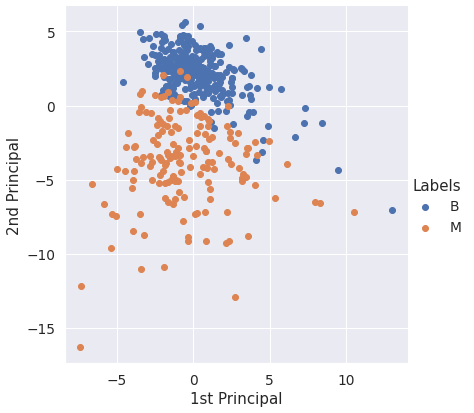

In [19]:
#plotting 2D datapoints 
sns.FacetGrid(plot_df, hue='Labels', size=6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()

In [20]:
#Presenting data on the plane of the second and third component

e_values_2, e_vectors_2 = eigh(cov_matrix, eigvals = (27,28))
#generates only the second largest and the third largest eigen values which are (27,28) for visualization

print('The shape of the eigen vectors is: ', e_vectors_2.shape)

e_vectors_2 = e_vectors_2.T
#converting into 2D shape for easiness
print('Changed shape of eigen vectors is: ', e_vectors_2.shape)

The shape of the eigen vectors is:  (30, 2)
Changed shape of eigen vectors is:  (2, 30)


In [21]:
#projecting the data on the 2D plane of 1st and 3rd components
new_coordinates_2 = np.matmul(e_vectors_2, x_train_std.T)
print('The shape of the resultant new data points is: ', e_vectors_2.shape,'X',x_train_std.T.shape, '=', new_coordinates_2.shape)

The shape of the resultant new data points is:  (2, 30) X (30, 455) = (2, 455)


In [22]:
#appending labels to the 2D projected data
new_coordinates_2 = np.vstack((new_coordinates_2, y_train)).T

#creating a new dataframe for plotting the labeled points
plot_df_2 = pd.DataFrame(data=new_coordinates_2, columns=('2nd Principal', '3rd Principal', 'Labels'))
print(plot_df_2.head())

  2nd Principal 3rd Principal Labels
0       0.40852       1.10667      B
1      0.263275      0.400452      B
2      -1.19354      -1.99544      B
3       1.08528      0.179338      B
4      -0.84729      -1.01762      B


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


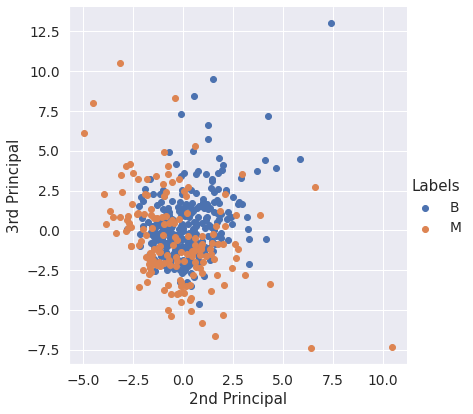

In [23]:
#plotting 2D datapoints 
sns.FacetGrid(plot_df_2, hue='Labels', size=6).map(plt.scatter, '2nd Principal', '3rd Principal').add_legend()
plt.show()

### **PCA using scikit-learn directly**

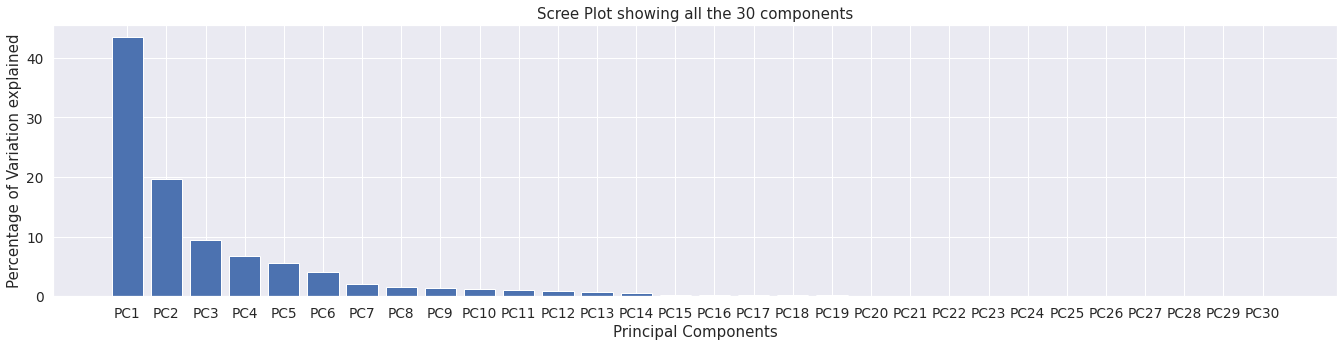

In [24]:
#performing the principal component analysis with all 30 components
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_train_std)

#now based on the scree plot we see how many principal components are actually needed
percent_var = np.round(pca.explained_variance_ratio_*100, decimals=1)   #calculating the percentage of variation that each principal component accounts for
labels = ['PC'+str(p) for p in range(1,len(percent_var)+1)]

#plotting the graph to see contribution of each principal component
f, ax = plt.subplots(figsize=(23,5))
plt.bar(x=range(1,len(percent_var)+1), height=percent_var, tick_label=labels)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variation explained')
plt.title('Scree Plot showing all the 30 components')
plt.show()

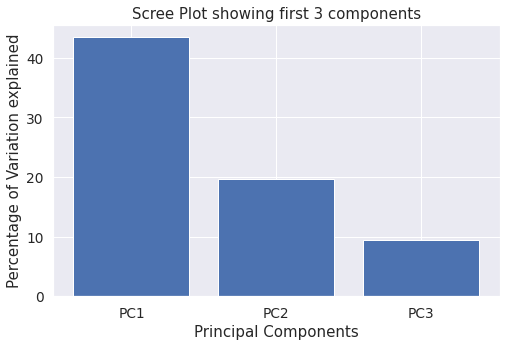

In [25]:
#performing the principal component analysis with 3 components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(x_train_std)

#now based on the scree plot we see how many principal components are actually needed
percent_var = np.round(pca.explained_variance_ratio_*100, decimals=1)   #calculating the percentage of variation that each principal component accounts for
labels = ['PC'+str(p) for p in range(1,len(percent_var)+1)]

#plotting the graph to see contribution of each principal component
f, ax = plt.subplots(figsize=(8,5))
plt.bar(x=range(1,len(percent_var)+1), height=percent_var, tick_label=labels)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variation explained')
plt.title('Scree Plot showing first 3 components')
plt.show()

In [26]:
explained_var = pca.explained_variance_ratio_
explained_var

array([0.43430767, 0.19740115, 0.09351771])

In [27]:
cum_var = np.cumsum(np.round(explained_var, decimals = 3))
cum_var_perc = cum_var*100

In [28]:
#creating a dataframe with the components
pc_df = pd.DataFrame(['PC1','PC2', 'PC3'], columns=['PC'])
explained_var_df = pd.DataFrame(explained_var, columns=['Explained variance'])
cum_var_df = pd.DataFrame(cum_var_perc, columns=['Cumulative variance (in %)'])

In [29]:
total_var_explained = pd.concat([pc_df, explained_var_df, cum_var_df], axis=1)
total_var_explained

,PC,Explained variance,Cumulative variance (in %)
0,PC1,0.434308,43.4
1,PC2,0.197401,63.1
2,PC3,0.093518,72.5


In [30]:
#transforming the data to the reduced dimension data
#this is the data that we are going to work with during the analysis

pca_data = pca.fit_transform(x_train_std)
print('The reduced data is of the dimension: ', pca_data.shape)

The reduced data is of the dimension:  (455, 3)


  1st Principal 2nd Principal Labels
0      -3.03916       1.10667      B
1      -2.28231      0.400452      B
2       -1.0841      -1.99544      B
3       -2.5611      0.179338      B
4      -2.84831      -1.01762      B


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


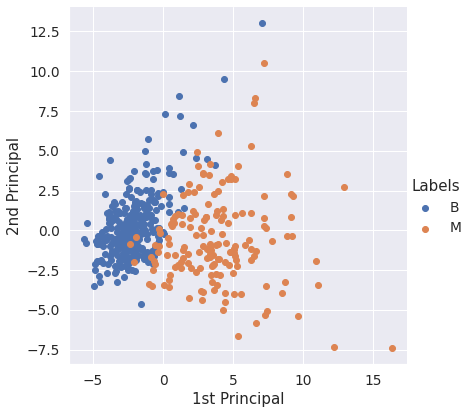

In [31]:
#appending labels to the 2D projected data
pca_1 = PCA(n_components=2)
pca_data_1 = pca_1.fit_transform(x_train_std)
pca_data_1 = np.vstack((pca_data_1.T, y_train)).T

#creating a new dataframe for plotting the labeled points
pca_df = pd.DataFrame(data=pca_data_1, columns=('1st Principal', '2nd Principal', 'Labels'))
print(pca_df.head())

#visualizing the 2D points
sns.FacetGrid(pca_df, hue='Labels', size=6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()

### **Performing k-means clustering of the data**

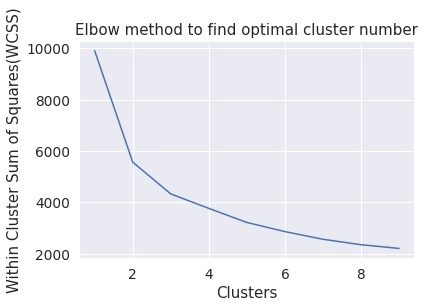

In [32]:
#k-means clustering is unsupervised ML algorithm that uses similar characteristics to form clusters
#we use the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
WCSS = []   #WCSS stands for Within Cluster Sum of Squares
for i in range(1,10):      #the for loop calculates the WCSS for each no.of cluster from 1 to 9 and at each iteration creates a K-Means algorithm for i
  kmeans = KMeans(n_clusters=i, init='random', max_iter = 300, n_init = 10, random_state=0)
  kmeans.fit(pca_data)
  WCSS.append(kmeans.inertia_)
plt.plot(range(1,10), WCSS)
plt.title('Elbow method to find optimal cluster number')
plt.xlabel('Clusters')
plt.ylabel('Within Cluster Sum of Squares(WCSS)')
plt.show()


Number of clusters:  2

Silhouette score =  0.46702919424266826

Number of clusters:  3

Silhouette score =  0.4328216565822074

Number of clusters:  4

Silhouette score =  0.27918660276276686

Number of clusters:  5

Silhouette score =  0.29093304348369414


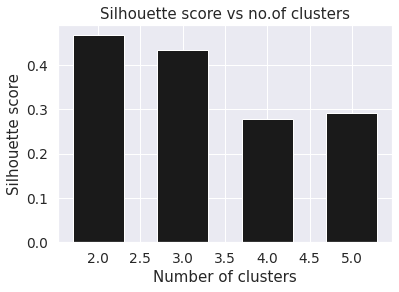

In [33]:
#calculating the performance of the algorithm
from sklearn import metrics

scores=[]
range_values = np.arange(2,6)

for i in range_values:
  kmeans = KMeans(n_clusters=i, init='random', n_init = 10, random_state=0)
  kmeans.fit(pca_data)
  score = metrics.silhouette_score(pca_data, kmeans.labels_, metric = 'euclidean', sample_size = len(pca_data))

  print('\nNumber of clusters: ', i)
  print('\nSilhouette score = ', score)

  scores.append(score)

#plotting the scores
plt.figure()
plt.bar(range_values, scores, width=0.6, color='k', align='center')
plt.title('Silhouette score vs no.of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

### **k-means clustering with random generation of centroids for 2 clusters**

In [34]:
#training the clustering model with 2 clusters
kmeans = KMeans(n_clusters=2, init='random', max_iter = 1, n_init = 1)
y_kmeans = kmeans.fit_predict(pca_data)   #not only fits the model to the data but also returns a dependent variable containing an array of numbers where each number corresponds a particular cluster
print(y_kmeans)
from sklearn.metrics import davies_bouldin_score
dv_score = davies_bouldin_score
index = kmeans.labels_
metric = dv_score(pca_data, index)
print('Pre-clustering metrics')
print('----------------------')
print('Davis-Bouldin Score:', metric)
print('Centroids:', kmeans.cluster_centers_)

[0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1
 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1
 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 1 1 0 1 0 1 0 0 1]
Pre-clustering metrics
----------------------
Davis-Bouldin Score: 1.1792203

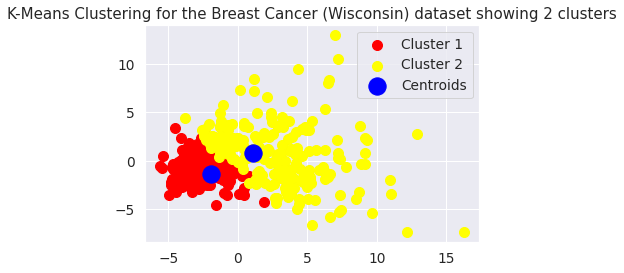

In [35]:
#Creating the clusters
plt.scatter(pca_data[y_kmeans == 0,0], pca_data[y_kmeans == 0,1], s=100, c='red', label='Cluster 1')

plt.scatter(pca_data[y_kmeans == 1,0], pca_data[y_kmeans == 1,1], s=100, c='yellow', label='Cluster 2')

#Creating the centroids for each cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='blue', label = 'Centroids')

plt.legend()

plt.title('K-Means Clustering for the Breast Cancer (Wisconsin) dataset showing 2 clusters')
plt.show()

### **k-means clustering with random generation of centroids for 3 clusters**

In [36]:
#training the clustering model with 3 clusters
kmeans_1 = KMeans(n_clusters=3, init='random', random_state=0)
y_kmeans_1 = kmeans_1.fit_predict(pca_data)   #not only fits the model to the data but also returns a dependent variable containing an array of numbers where each number corresponds a particular cluster
print(y_kmeans_1)
dv_score_1 = davies_bouldin_score
index = kmeans_1.labels_
metric = dv_score_1(pca_data, index)
print('Pre-clustering metrics')
print('----------------------')
print('Davis-Bouldin Score:', metric)
print('Centroids:', kmeans_1.cluster_centers_)

[1 1 1 1 1 1 1 1 0 1 2 0 1 1 1 1 2 1 1 0 0 1 1 1 2 0 1 1 2 1 1 2 1 1 1 1 1
 0 0 1 1 0 1 1 1 2 2 1 0 2 1 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 2 1 1 2 0 1 0 2 2 1 1 1 1 1 1 2 2 1 1 0 2 1 1 1 1 1 2 1 2 1 2 1 0 1 1 1 1
 1 1 0 1 2 1 1 1 2 1 1 1 0 1 1 1 2 1 2 1 0 1 0 0 1 0 1 1 1 2 1 0 1 2 1 0 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 2 1 2 0 1 0 0 0 1 1 0 2 1
 1 0 1 1 1 2 1 1 1 0 1 2 2 0 1 1 1 1 2 1 1 1 1 1 1 1 2 1 0 1 1 0 1 1 1 1 2
 2 1 1 1 2 1 2 2 1 1 1 0 1 2 1 0 2 1 1 2 2 1 1 1 2 0 0 1 0 1 1 1 0 1 2 0 2
 0 2 2 0 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 0 1 1 2 1 1 0 1 0 1 1 1 1 1
 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 0 1 1 1 0 2 1 2 1 2 1 1 0 1 1 1 2 1 2 1 1 2
 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 2 2 1 1 1 0 1 1 1 1 2 1 0 0 0 1 2 0 2 1 2
 2 1 1 1 1 1 1 1 1 2 2 0 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 0 1 0 1 1 1
 2 0 1 1 0 2 0 1 2 0 2 1 1 2 1 0 0 1 1 1 0 2 1 1 2 0 1 1 0 1 1 1 1 2 0 1 2
 1 1 1 1 1 2 1 0 1 1 1]
Pre-clustering metrics
----------------------
Davis-Bouldin Score: 1.0733612

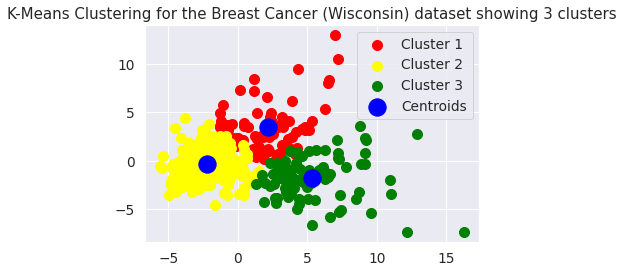

In [37]:
#Creating the clusters
plt.scatter(pca_data[y_kmeans_1 == 0,0], pca_data[y_kmeans_1 == 0,1], s=100, c='red', label='Cluster 1')

plt.scatter(pca_data[y_kmeans_1 == 1,0], pca_data[y_kmeans_1 == 1,1], s=100, c='yellow', label='Cluster 2')

plt.scatter(pca_data[y_kmeans_1 == 2,0], pca_data[y_kmeans_1 == 2,1], s=100, c='green', label='Cluster 3')

#Creating the centroids for each cluster
plt.scatter(kmeans_1.cluster_centers_[:,0], kmeans_1.cluster_centers_[:,1], s=300, c='blue', label = 'Centroids')

plt.legend()

plt.title('K-Means Clustering for the Breast Cancer (Wisconsin) dataset showing 3 clusters')
plt.show()

### **k-means clustering with random generation of centroids for 5 clusters**

In [38]:
#training the clustering model with 5 clusters
kmeans_2 = KMeans(n_clusters=5, init='random', random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(pca_data)   #not only fits the model to the data but also returns a dependent variable containing an array of numbers where each number corresponds a particular cluster
print(y_kmeans_2)
dv_score_2 = davies_bouldin_score
index = kmeans_2.labels_
metric = dv_score_2(pca_data, index)
print('Pre-clustering metrics')
print('----------------------')
print('Davis-Bouldin Score:', metric)
print('Centroids:', kmeans_2.cluster_centers_)

[1 1 4 4 4 4 4 4 3 1 2 1 4 4 1 4 0 4 4 1 3 4 4 4 2 1 4 1 0 4 1 0 4 4 4 4 1
 3 3 1 1 0 4 4 4 0 0 4 1 0 4 0 3 0 1 4 1 1 4 4 0 1 4 1 4 4 0 1 4 4 1 4 4 1
 0 4 1 0 3 1 1 2 2 4 4 4 4 4 4 2 0 4 4 3 0 4 1 4 1 4 2 1 2 4 0 1 3 4 4 4 4
 4 1 0 4 0 4 1 4 0 4 4 4 3 1 4 0 0 4 2 1 3 4 3 3 0 0 1 4 4 2 1 3 4 0 4 1 0
 4 4 4 1 4 4 1 4 4 4 1 4 4 0 1 4 1 3 4 1 4 1 4 4 2 4 0 1 1 1 1 3 0 4 3 0 1
 4 3 4 4 1 0 1 4 4 3 4 0 0 1 1 1 4 0 0 4 1 4 4 1 4 4 0 1 3 1 1 0 1 4 1 1 0
 2 4 1 4 0 4 0 0 4 1 4 1 1 0 4 3 0 4 4 0 2 1 4 4 0 1 1 4 3 1 1 4 0 4 0 1 2
 0 0 0 1 4 4 1 4 0 4 4 4 4 4 1 4 4 0 4 4 0 0 0 3 4 1 2 1 4 3 0 1 1 1 1 1 1
 0 0 2 1 0 2 4 1 4 1 4 1 0 4 4 1 4 4 4 3 0 4 0 1 2 4 4 3 4 1 4 0 0 0 1 4 2
 0 4 4 1 1 1 3 4 1 4 4 4 4 4 1 4 2 0 1 1 4 3 4 4 1 4 0 4 3 1 0 1 2 1 0 1 0
 2 1 4 4 1 4 4 1 4 2 2 0 0 0 1 1 4 4 4 4 1 0 4 0 4 1 1 1 4 2 0 3 4 3 1 4 1
 2 3 0 4 0 0 3 4 2 1 0 1 1 0 1 1 0 4 4 1 3 0 4 4 2 1 1 1 0 1 4 1 1 0 1 4 0
 1 4 1 1 4 0 4 3 4 4 1]
Pre-clustering metrics
----------------------
Davis-Bouldin Score: 1.1985841

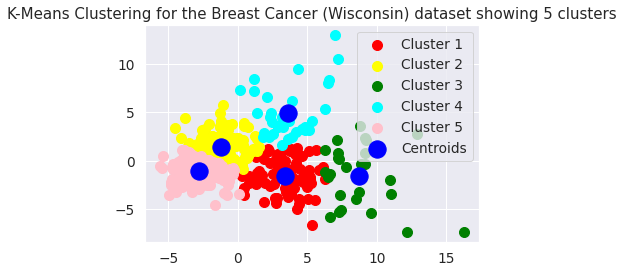

In [39]:
#Creating the clusters
plt.scatter(pca_data[y_kmeans_2 == 0,0], pca_data[y_kmeans_2 == 0,1], s=100, c='red', label='Cluster 1')

plt.scatter(pca_data[y_kmeans_2 == 1,0], pca_data[y_kmeans_2 == 1,1], s=100, c='yellow', label='Cluster 2')

plt.scatter(pca_data[y_kmeans_2 == 2,0], pca_data[y_kmeans_2 == 2,1], s=100, c='green', label='Cluster 3')

plt.scatter(pca_data[y_kmeans_2 == 3,0], pca_data[y_kmeans_2 == 3,1], s=100, c='cyan', label='Cluster 4')

plt.scatter(pca_data[y_kmeans_2 == 4,0], pca_data[y_kmeans_2 == 4,1], s=100, c='pink', label='Cluster 5')

#Creating the centroids for each cluster
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s=300, c='blue', label = 'Centroids')

plt.legend()

plt.title('K-Means Clustering for the Breast Cancer (Wisconsin) dataset showing 5 clusters')
plt.show()

### **Clustering and Classification**

In [40]:
#Calculating the purity metric 

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [47]:
purity_score(y_train, y_kmeans)

0.9252747252747253

In [41]:
purity_score(y_train, y_kmeans_1)

0.8637362637362638

In [42]:
purity_score(y_train, y_kmeans_2)

0.9186813186813186

In [43]:
#Encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)
print(y_train)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 0 0]


###**Classification model training on the data to compare results**

### K-NN classification using 3 principal components

In [44]:
#Training the K-NN model on the reduced training set with 3 features
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(pca_data, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
pca_data_test = pca.fit_transform(x_test_std)
y_test = le.fit_transform(y_test)
#Predicting the test set result
y_pred=classifier.predict(pca_data_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [46]:
#Evaluating model performance
from sklearn.metrics import confusion_matrix, accuracy_score
cm=(confusion_matrix(y_test,y_pred))
print(cm)
ac=(accuracy_score(y_test,y_pred))*100
print(ac,"%")

[[63  4]
 [ 3 44]]
93.85964912280701 %


### K-NN classification using 4 principal components

In [47]:
#Performing PCA with 4 components
pca_1 = PCA(n_components=4)
pca_data_4comp = pca_1.fit_transform(x_train_std)


#Training the K-NN model on the reduced training set
from sklearn.neighbors import KNeighborsClassifier
classifier_1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_1.fit(pca_data_4comp, y_train)

#Predicting the test set result
pca_data_test_1 = pca_1.fit_transform(x_test_std)
y_pred_1=classifier_1.predict(pca_data_test_1)
print(np.concatenate((y_pred_1.reshape(len(y_pred_1),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [48]:
#Evaluating model performance
cm_1=(confusion_matrix(y_test,y_pred_1))
print(cm_1)
ac=(accuracy_score(y_test,y_pred_1))*100
print(ac,"%")

[[66  1]
 [ 5 42]]
94.73684210526315 %


### K-NN classification using 5 principal components

In [49]:
#Performing PCA with 5 components
pca_2 = PCA(n_components=5)
pca_data_5comp = pca_2.fit_transform(x_train_std)


#Training the K-NN model on the reduced training set
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_2.fit(pca_data_5comp, y_train)

#Predicting the test set result
pca_data_test_2 = pca_2.fit_transform(x_test_std)
y_pred_2=classifier_2.predict(pca_data_test_2)
print(np.concatenate((y_pred_2.reshape(len(y_pred_2),1), y_test.reshape(len(y_test),1)),1))


#Evaluating model performance
cm_2=(confusion_matrix(y_test,y_pred_2))
print(cm_2)
ac=(accuracy_score(y_test,y_pred_2))*100
print(ac,"%")

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]
[[63  4]
 [ 4 43]]
92.98245614035088 %


### K-NN classification using 6 principal components

In [55]:
#Performing PCA with 6 components
pca_3 = PCA(n_components=6)
pca_data_6comp = pca_3.fit_transform(x_train_std)


#Training the K-NN model on the reduced training set
from sklearn.neighbors import KNeighborsClassifier
classifier_3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_3.fit(pca_data_6comp, y_train)

#Predicting the test set result
pca_data_test_3 = pca_3.fit_transform(x_test_std)
y_pred_3=classifier_3.predict(pca_data_test_3)
print(np.concatenate((y_pred_3.reshape(len(y_pred_3),1), y_test.reshape(len(y_test),1)),1))


#Evaluating model performance
cm_3=(confusion_matrix(y_test,y_pred_3))
print(cm_3)
ac=(accuracy_score(y_test,y_pred_3))*100
print(ac,"%")

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]
[[63  4]
 [ 5 42]]
92.10526315789474 %
